In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/Dataset/vehicles.csv.zip', 'r') as zip_ref:
  zip_ref.extractall('/content/')

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/vehicles.csv.zip')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

#I have built this univarate graph where i have used Fuel type as label and counted how much of each fuel type is been used

In [6]:
new_df = df

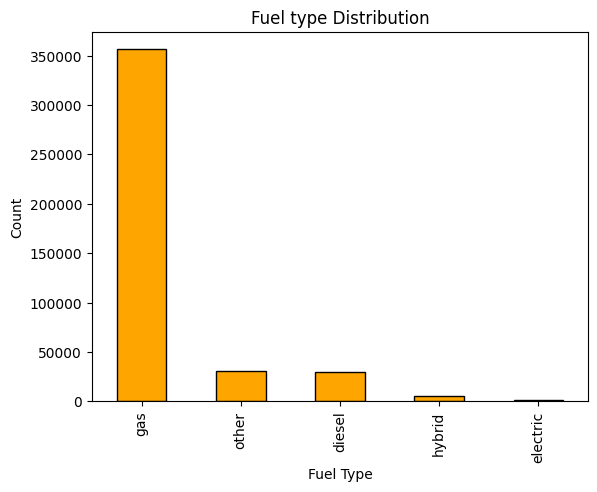

In [ ]:
new_df['fuel'].value_counts().plot(kind='bar', color='orange', edgecolor='black')
plt.title('Fuel type Distribution')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

#As we can clearly make an observation that fuel type gas is been used most followed by other,diesel and hybrid though they are much smaller compared to gas

#This is also one more univarate graph which i have used to show frequency of vehicles sales by each year

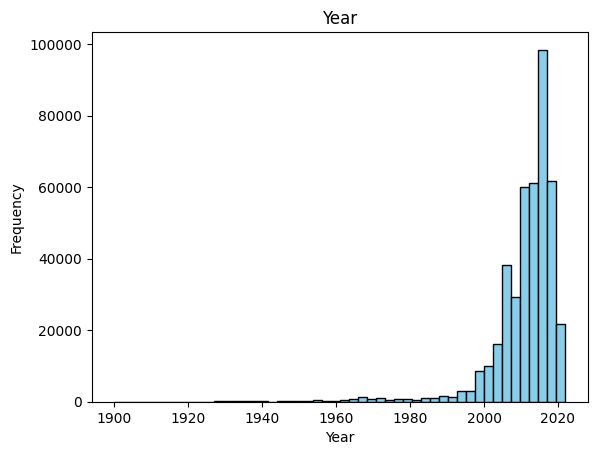

In [ ]:
plt.hist(new_df['year'], bins=50, color='skyblue', edgecolor='black')
plt.title('Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

#The decade from 2010 to 2020 we can clearly the most sales has happened

#This is also univarate graph where i've checked which Manufacturer have sold most number of cars

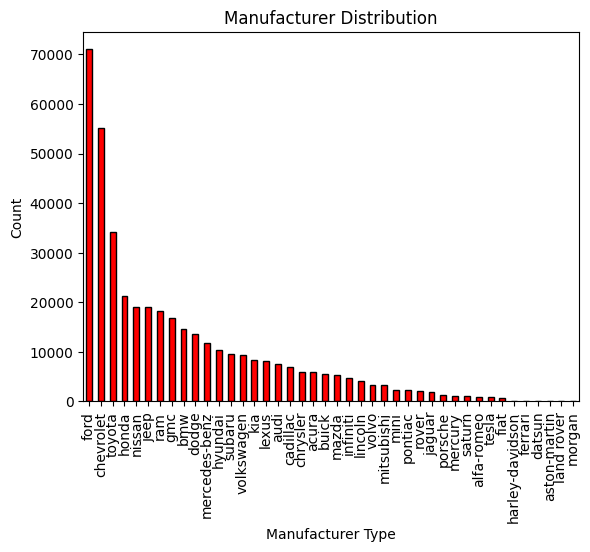

In [ ]:
new_df['manufacturer'].value_counts().plot(kind='bar', color='red', edgecolor='black')
plt.title('Manufacturer Distribution')
plt.xlabel('Manufacturer Type')
plt.ylabel('Count')
plt.show()

#The ford is leadning this segment followed by chevrolet and toyota

#The univarate graph where i've shown that most types of vehicles that are been sold

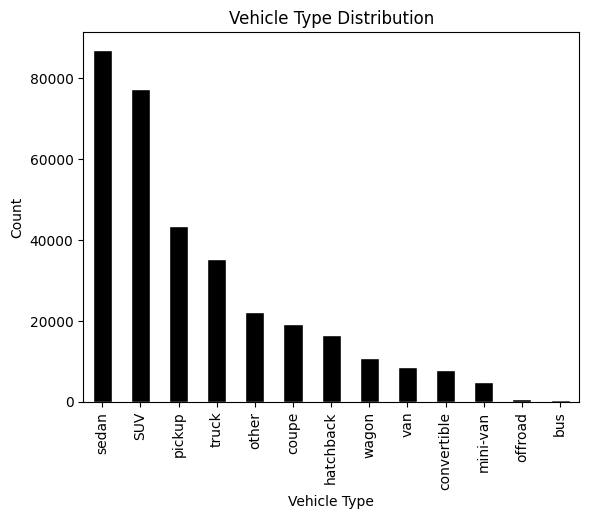

In [ ]:
new_df['type'].value_counts().plot(kind='bar', color='black', edgecolor='white')
plt.title('Vehicle Type Distribution')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.show()

#The Sedan and SUV are leading in this section

#This Graph is about seeing which Transmission type of vehicles is majorily used by the people

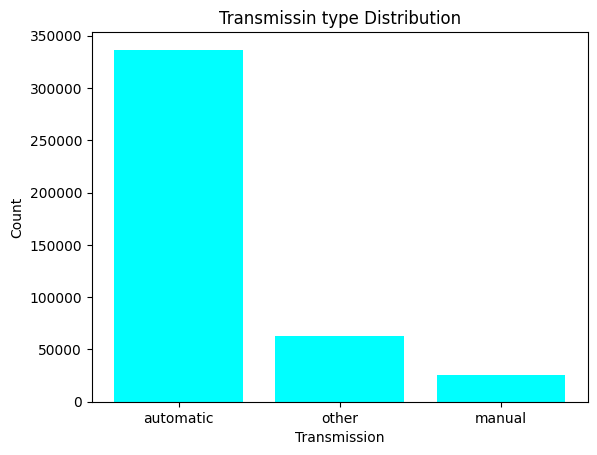

In [ ]:
trainmission_counts = new_df['transmission'].value_counts()
plt.bar(trainmission_counts.index, trainmission_counts.values, color='cyan')
plt.title('Transmissin type Distribution')
plt.xlabel('Transmission')
plt.ylabel('Count')
plt.show()

#As it is clear automatic types of vehicles are majorily used by the people

#Here i've performed a Bivarate observation where i have grouped type of vehicles by there price

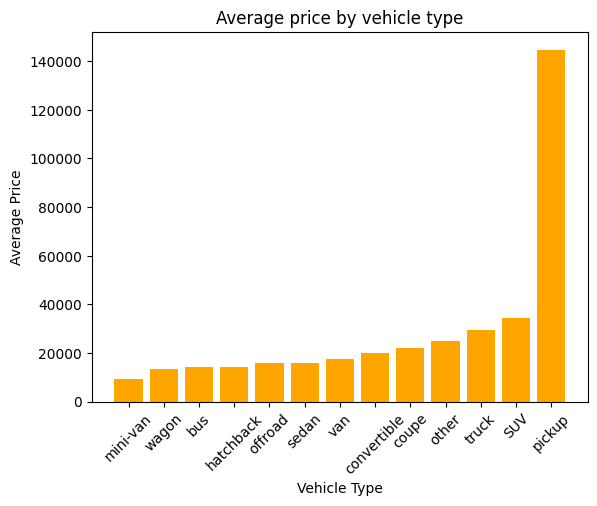

In [ ]:
avg_price_by_type = new_df.groupby('type')['price'].mean().sort_values()
plt.bar(avg_price_by_type.index, avg_price_by_type.values, color='orange')
plt.title('Average price by vehicle type')
plt.xlabel('Vehicle Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

#It is been clear from the observation that pickup and sedan followed by SUV are leading the price sector

#Tried to built a heatmap using all of the available different features however i used price,year and odometer for that

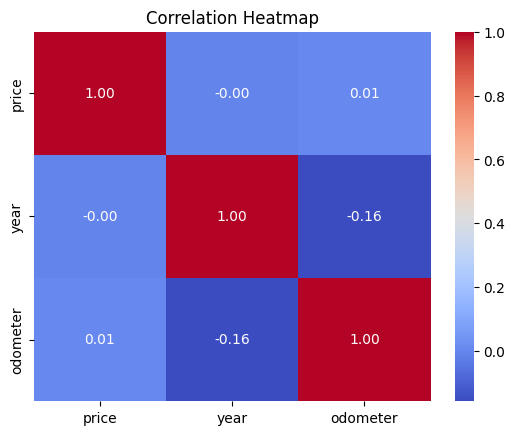

In [ ]:
import seaborn as sns
corr_matrix = new_df[['price','year','odometer']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

#But as we can see from the observation that no values are correlated to each other than themselves

#This is also one more univarate graph where what i actually did is i have used region and counted most listing from regions

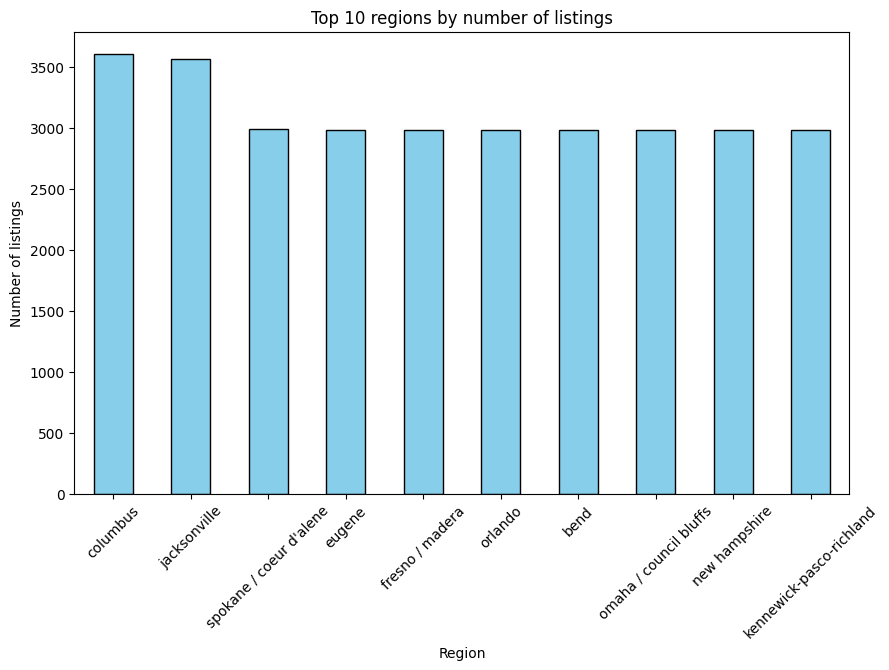

In [ ]:
region_counts = new_df['region'].value_counts().head(10)
region_counts.plot(kind='bar', figsize=(10,6), color='skyblue', edgecolor='black')
plt.title('Top 10 regions by number of listings')
plt.xlabel('Region')
plt.ylabel('Number of listings')
plt.xticks(rotation=45)
plt.show()

#I've did listings and clearly we can see that columbus and jacksonville is leading with the listing

#Constructed a Bivarate graph where used to columns named region and price to see actually find out average price according to the regions

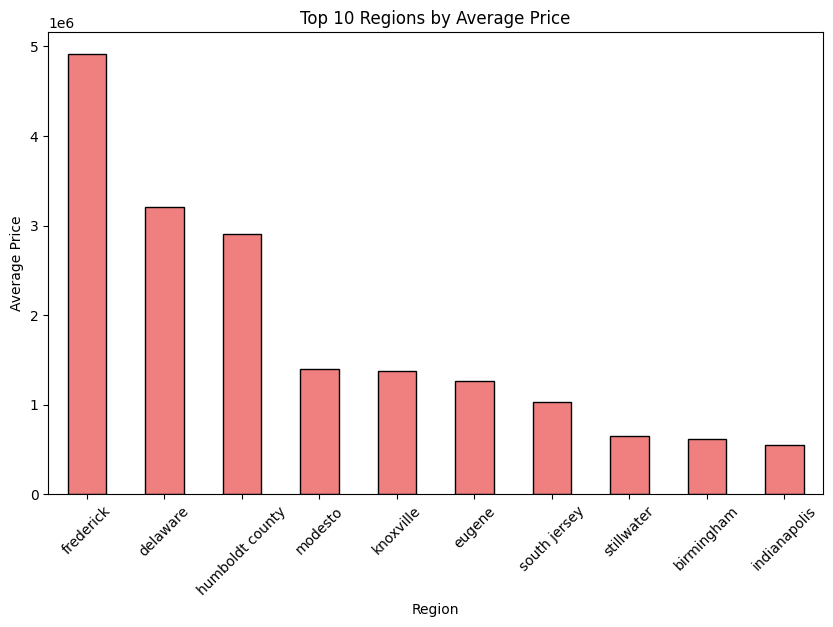

In [ ]:
avg_price_by_region = df.groupby('region')['price'].mean().sort_values(ascending=False).head(10)
avg_price_by_region.plot(kind='bar', figsize=(10,6), color='lightcoral', edgecolor='black')
plt.title('Top 10 Regions by Average Price')
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

#It is been clear that frederick and delaware are leading with the highest price followed by others such as humboldt country and modesto

#Univarate graph to check condition of vehicles

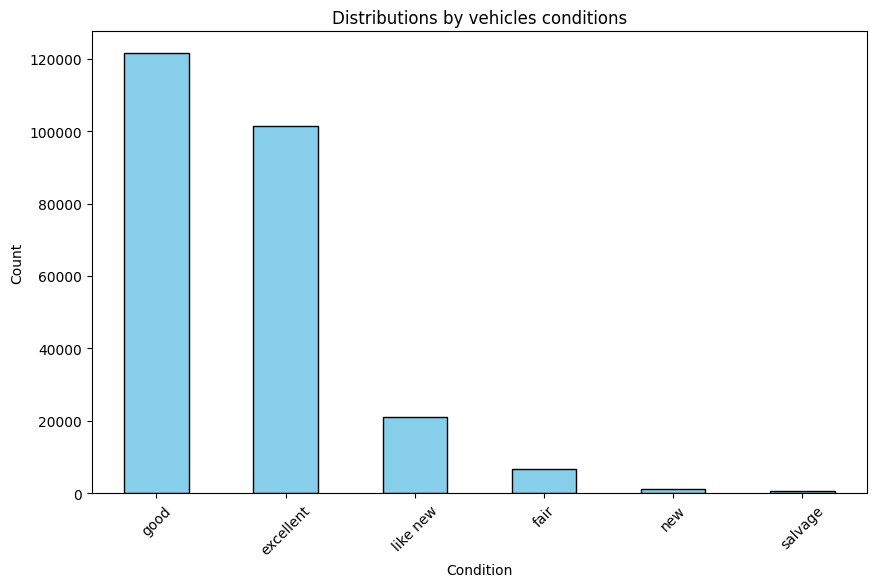

In [ ]:
condition_counts = new_df['condition'].value_counts()
plt.figure(figsize=(10,6))
condition_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distributions by vehicles conditions')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#Well majority of vehicles are in good condition

<Figure size 1000x600 with 0 Axes>

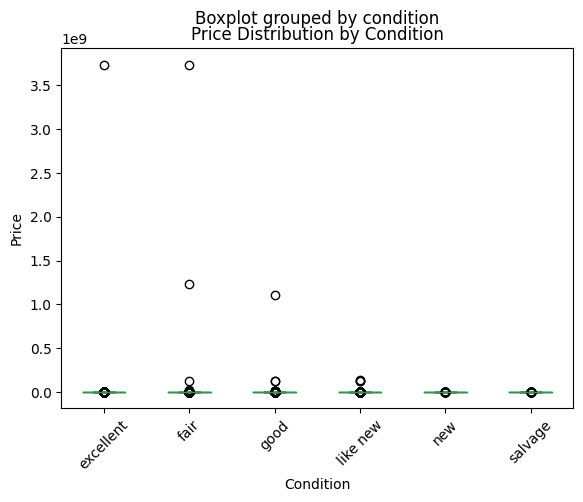

In [ ]:
plt.figure(figsize=(10,6))
new_df.boxplot(column='price', by='condition', grid=False)
plt.title('Price Distribution by Condition')
plt.xlabel('Condition')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

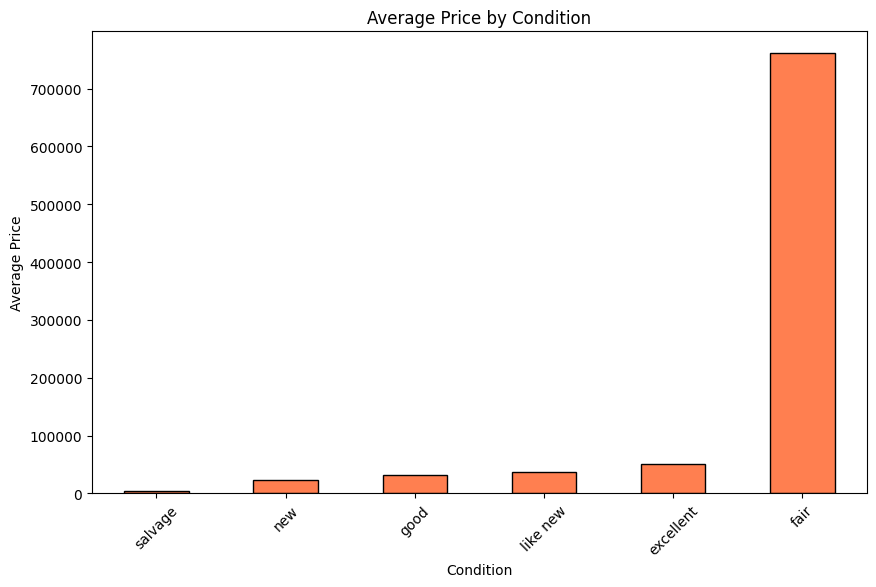

In [ ]:
avg_price_by_condition =  new_df.groupby('condition')['price'].mean().sort_values()
plt.figure(figsize=(10,6))
avg_price_by_condition.plot(kind='bar', color='coral', edgecolor='black')
plt.title('Average Price by Condition')
plt.xlabel('Condition')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

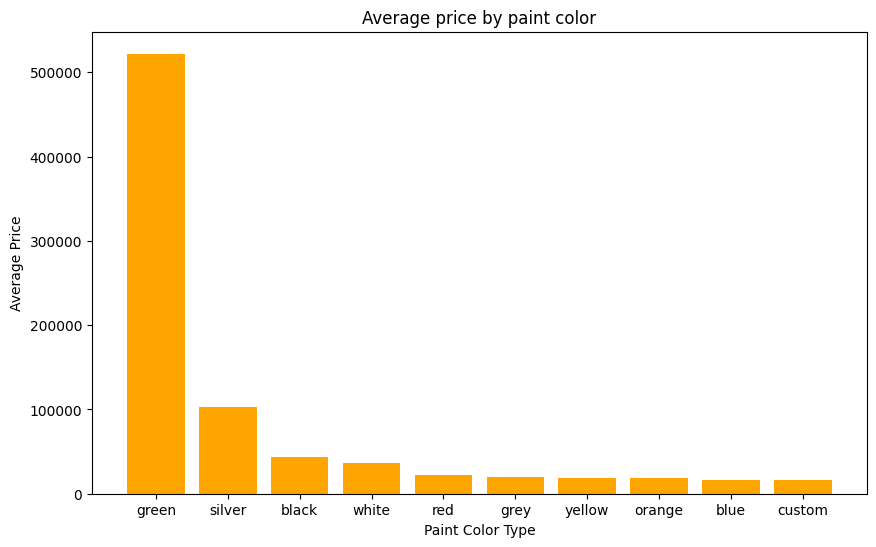

In [ ]:
paint_prices = new_df.groupby('paint_color')['price'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
plt.bar(paint_prices.index, paint_prices.values, color='orange')
plt.xlabel('Paint Color Type')
plt.ylabel('Average Price')
plt.title('Average price by paint color')
plt.show()

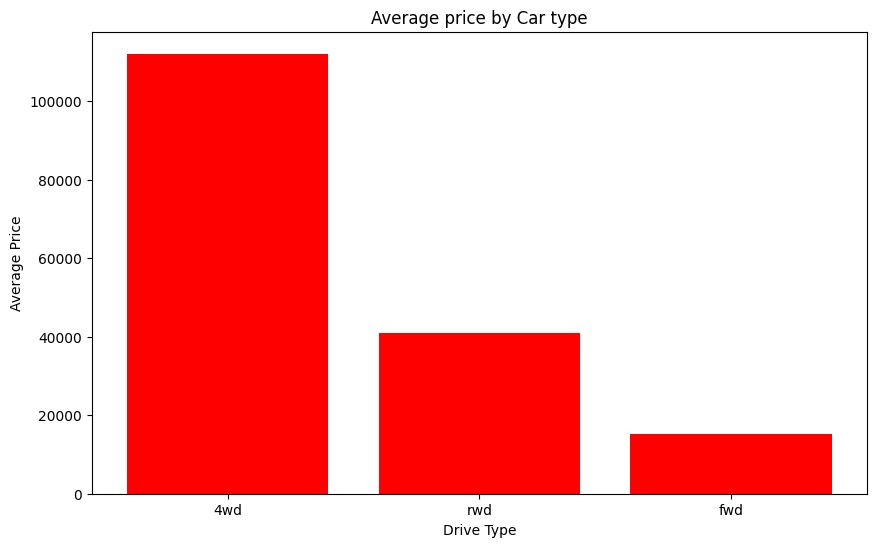

In [ ]:
drive_prices = new_df.groupby('drive')['price'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,6))
plt.bar(drive_prices.index, drive_prices.values, color='red')
plt.xlabel('Drive Type')
plt.ylabel('Average Price')
plt.title('Average price by Car type')
plt.show()

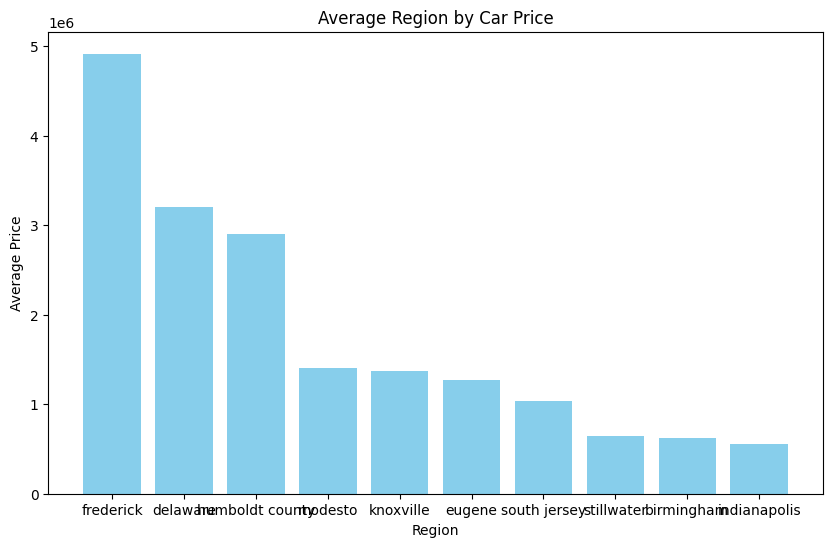

In [ ]:
region_prices = new_df.groupby('region')['price'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
plt.bar(region_prices.index, region_prices.values, color='skyblue')
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Region by Car Price')
plt.show()

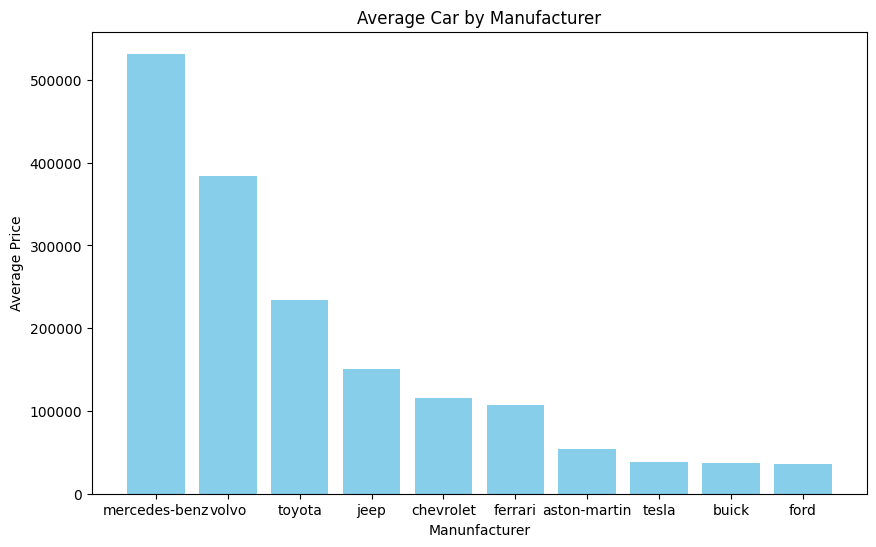

In [ ]:
manufacturer_prices = new_df.groupby('manufacturer')['price'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
plt.bar(manufacturer_prices.index, manufacturer_prices.values, color='skyblue')
plt.xlabel('Manunfacturer')
plt.ylabel('Average Price')
plt.title('Average Car by Manufacturer')
plt.show()

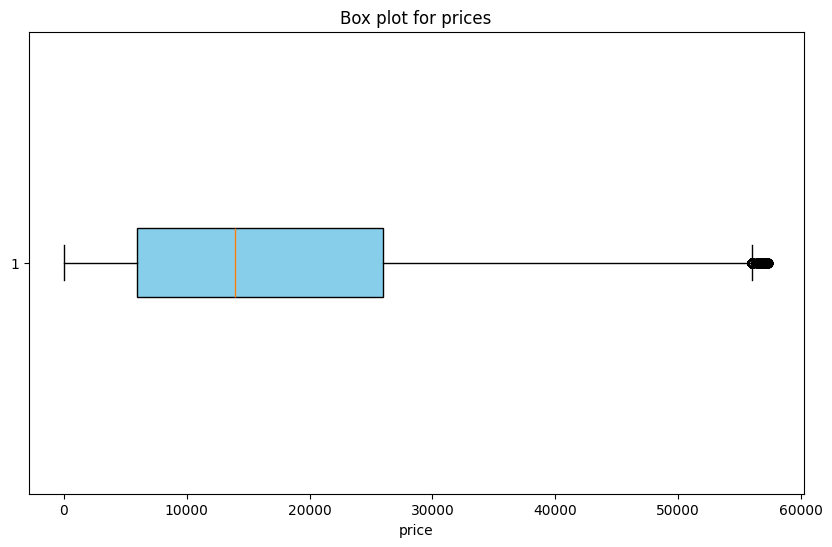

In [ ]:
plt.figure(figsize=(10,6))
plt.boxplot(cleaned_df['price'], vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title('Box plot for prices')
plt.xlabel('price')
plt.show()

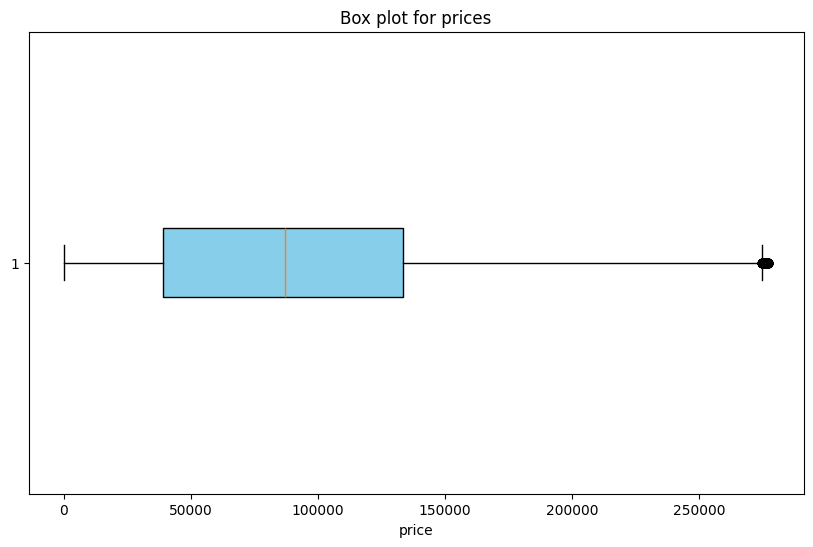

In [ ]:
plt.figure(figsize=(10,6))
plt.boxplot(cleaned_df['odometer'], vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title('Box plot for prices')
plt.xlabel('price')
plt.show()

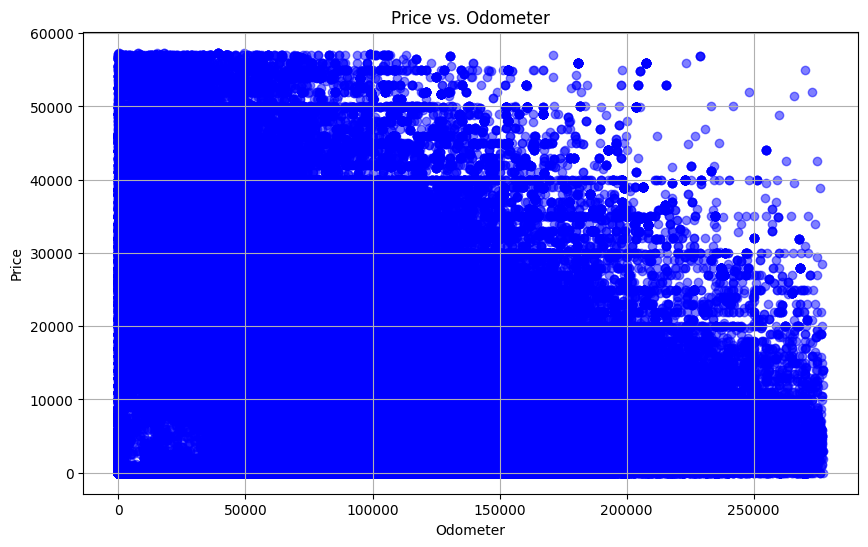

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_df['odometer'], cleaned_df['price'], alpha=0.5, c='blue')
plt.title('Price vs. Odometer')
plt.xlabel('Odometer')
plt.ylabel('Price')
plt.grid(True)
plt.show()

#From here i started doing something else

In [7]:
testing_df = df

In [8]:
print((testing_df.isna().sum()) / len(testing_df) * 100)

id                0.000000
url               0.000000
region            0.000000
region_url        0.000000
price             0.000000
year              0.282281
manufacturer      4.133714
model             1.236179
condition        40.785232
cylinders        41.622470
fuel              0.705819
odometer          1.030735
title_status      1.930753
transmission      0.598763
VIN              37.725356
drive            30.586347
size             71.767476
type             21.752717
paint_color      30.501078
image_url         0.015930
description       0.016398
county          100.000000
state             0.000000
lat               1.534155
long              1.534155
posting_date      0.015930
dtype: float64


In [9]:
columns_to_remove = ['id','url','region','region_url','VIN','size','image_url','description','county','state','lat','long','posting_date']
testing_df.drop(columns=columns_to_remove, inplace=True)

In [10]:
testing_df = testing_df.dropna(subset=['year','odometer','manufacturer'])

In [11]:
testing_df.fillna('unknown', inplace=True)

<ipython-input-11-29693d51f49f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing_df.fillna('unknown', inplace=True)


In [12]:
testing_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 405077 entries, 27 to 426879
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         405077 non-null  int64  
 1   year          405077 non-null  float64
 2   manufacturer  405077 non-null  object 
 3   model         405077 non-null  object 
 4   condition     405077 non-null  object 
 5   cylinders     405077 non-null  object 
 6   fuel          405077 non-null  object 
 7   odometer      405077 non-null  float64
 8   title_status  405077 non-null  object 
 9   transmission  405077 non-null  object 
 10  drive         405077 non-null  object 
 11  type          405077 non-null  object 
 12  paint_color   405077 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 43.3+ MB


In [13]:
testing_df.duplicated().sum()

170256

In [14]:
testing_df.drop_duplicates

<bound method DataFrame.drop_duplicates of         price    year manufacturer                     model  condition  \
27      33590  2014.0          gmc  sierra 1500 crew cab slt       good   
28      22590  2010.0    chevrolet            silverado 1500       good   
29      39590  2020.0    chevrolet       silverado 1500 crew       good   
30      30990  2017.0       toyota      tundra double cab sr       good   
31      15000  2013.0         ford                 f-150 xlt  excellent   
...       ...     ...          ...                       ...        ...   
426875  23590  2019.0       nissan         maxima s sedan 4d       good   
426876  30590  2020.0        volvo  s60 t5 momentum sedan 4d       good   
426877  34990  2020.0     cadillac          xt4 sport suv 4d       good   
426878  28990  2018.0        lexus           es 350 sedan 4d       good   
426879  30590  2019.0          bmw  4 series 430i gran coupe       good   

          cylinders    fuel  odometer title_status transmission    drive  \
27      8 cylinders     gas   57923.0        clean        other  unknown   
28      8 cylinders     gas   71229.0        clean        other  unknown   
29      8 cylinders     gas   19160.0        clean        other  unknown   
30      8 cylinders     gas   41124.0        clean        other  unknown   
31      6 cylinders     gas  128000.0        clean    automatic      rwd   
...             ...     ...       ...          ...          ...      ...   
426875  6 cylinders     gas   32226.0        clean        other      fwd   
426876      unknown     gas   12029.0        clean        other      fwd   
426877      unknown  diesel    4174.0        clean        other  unknown   
426878  6 cylinders     gas   30112.0        clean        other      fwd   
426879      unknown     gas   22716.0        clean        other      rwd   

             type paint_color  
27         pickup       white  
28         pickup        blue  
29         pickup         red  
30         pickup         red  
31          truck       black  
...           ...         ...  
426875      sedan     unknown  
426876      sedan         red  
426877  hatchback       white  
426878      sedan      silver  
426879      coupe     unknown  

[405077 rows x 13 columns]>

In [15]:
testing_df['year'].value_counts()

,count
year,
2018.0,35500
2017.0,35425
2015.0,30198
2013.0,29353
2014.0,29069
...,...
1915.0,1
1905.0,1
1918.0,1


In [16]:
def remove_outliers_iqr(demo_df, column):
  Q1 = demo_df[column].quantile(0.25)
  Q3 = demo_df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - (1.5 * IQR)
  upper_bound = Q3 + (1.5 * IQR)

  filtered_df = demo_df[(demo_df[column] >= lower_bound) & (demo_df[column] <= upper_bound)]
  return filtered_df

testing_df = remove_outliers_iqr(testing_df, 'price')
testing_df = remove_outliers_iqr(testing_df, 'odometer')

In [17]:
testing_df.drop(testing_df[testing_df["odometer"] == 0.0].index, inplace=True)

In [18]:
import numpy as np
rr = sorted(testing_df['price'])
quantile1, quantile2 = np.percentile(rr, [10,100])
testing_df = testing_df[(testing_df.price < 43998) & (testing_df.price >= 799)]
testing_df.shape

(340866, 13)

In [19]:
testing_df['price'].max()

43997

In [20]:
rp = sorted(testing_df['odometer'])
q1, q2 = np.percentile(rp, [0,100])
print(q1, q2)

1.0 276525.0


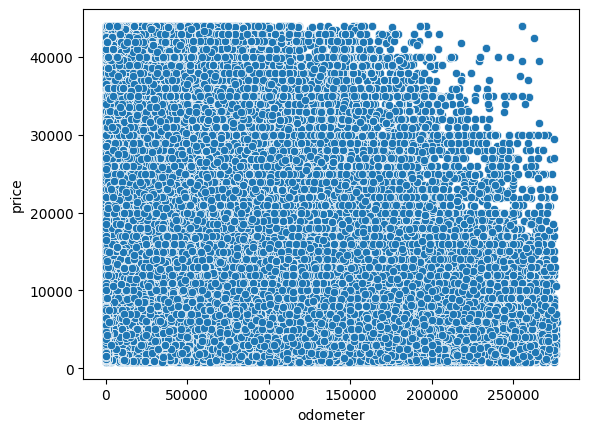

In [21]:
import seaborn as sns
ax = sns.scatterplot(x="odometer", y='price', data=testing_df)
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)

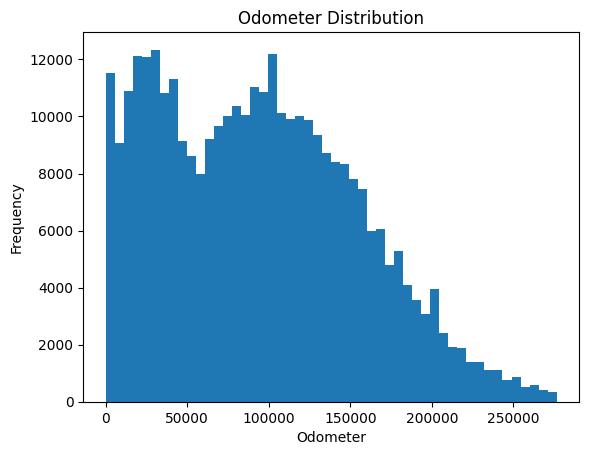

In [ ]:
import matplotlib.pyplot as plt
plt.hist(testing_df['odometer'], bins=50)
plt.xlabel('Odometer')
plt.ylabel('Frequency')
plt.title('Odometer Distribution')
plt.show()

In [22]:
testing_df = testing_df[(testing_df.odometer < 500000)]

In [23]:
testing_df['odometer'].shape

(340866,)

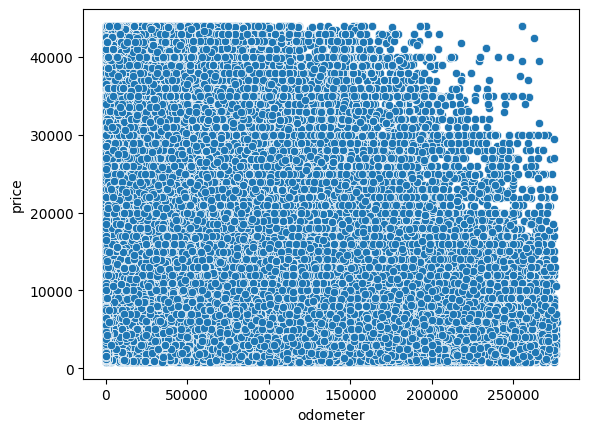

In [ ]:
ax = sns.scatterplot(x="odometer", y='price', data=testing_df)
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)

In [24]:
testing_df.describe()

,price,year,odometer
count,340866.000000,340866.000000,340866.000000
mean,17279.940971,2011.078415,94378.949892
std,11185.275347,8.848966,60437.983039
min,799.000000,1900.000000,1.000000
25%,7600.000000,2008.000000,41686.750000
50%,14995.000000,2013.000000,91041.000000
75%,25990.000000,2017.000000,137180.000000
max,43997.000000,2022.000000,276525.000000


In [25]:
testing_df.replace('unknown',np.nan, inplace=True)

In [26]:
print((testing_df.isna().sum()) / len(testing_df) * 100)

price            0.000000
year             0.000000
manufacturer     0.000000
model            1.083417
condition       36.622309
cylinders       40.279465
fuel             0.546256
odometer         0.000000
title_status     1.607963
transmission     0.390769
drive           30.436007
type            20.824606
paint_color     28.352490
dtype: float64


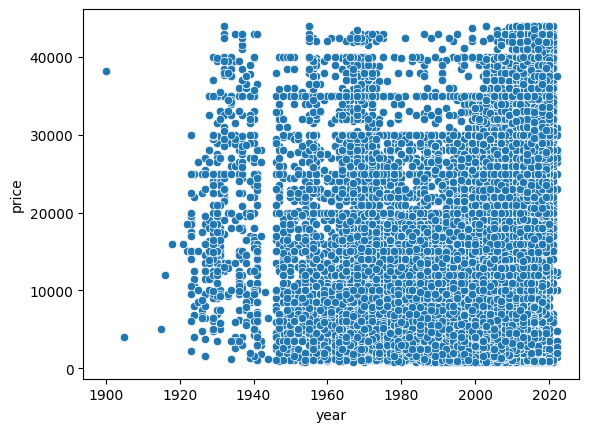

In [ ]:
bx = sns.scatterplot(x='year',y='price',data=testing_df)

In [27]:
testing_df = testing_df[(testing_df.year > 1940)]

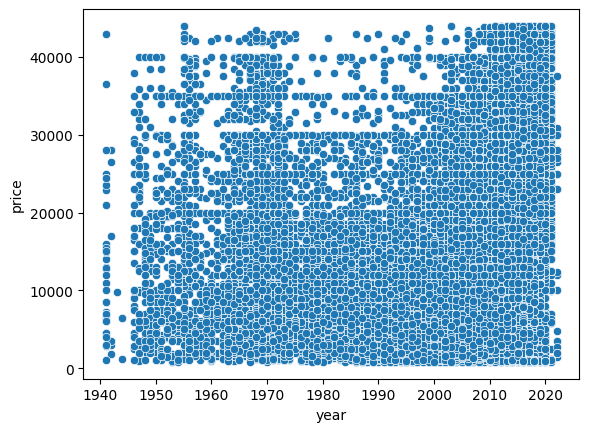

In [ ]:
bx = sns.scatterplot(x='year', y='price', data=testing_df)

In [28]:
null_values = testing_df.isnull().sum()
null_values = pd.DataFrame(null_values, columns=['null'])
j = 1
sum_tot = len(testing_df)
null_values['percent'] = null_values['null'] / sum_tot
round(null_values*100,3).sort_values('percent', ascending=False)

,null,percent
cylinders,13714500,40.295
condition,12469500,36.637
drive,10353900,30.421
paint_color,9644200,28.336
type,7076200,20.791
title_status,548100,1.610
model,357100,1.049
fuel,186200,0.547
transmission,133200,0.391
price,0,0.000


In [29]:
testing_df.condition.value_counts()

,count
condition,
good,108742
excellent,83424
like new,17048
fair,5363
new,664
salvage,416


In [30]:
excellent_odo_mean = testing_df[testing_df['condition'] == 'excellent']['odometer'].mean()
good_odo_mean = testing_df[testing_df['condition'] == 'good']['odometer'].mean()
like_new_odo_mean = testing_df[testing_df['condition'] == 'like new']['odometer'].mean()
fair_odo_mean = testing_df[testing_df['condition'] == 'fair']['odometer'].mean()
new_odo_mean = testing_df[testing_df['condition'] == 'new']['odometer'].mean()
salvage_odo_mean = testing_df[testing_df['condition'] == 'salvage']['odometer'].mean()

print('excellent average odometer: ', round(excellent_odo_mean,2))
print('good average odometer: ', round(good_odo_mean,2))
print('Like new average odometer: ', round(like_new_odo_mean,2))
print('fair average odometer: ', round(fair_odo_mean,2))
print('new average odometer: ', round(new_odo_mean,2))
print('Salvage average odometer: ', round(salvage_odo_mean,2))

excellent average odometer:  108429.25
good average odometer:  75847.45
Like new average odometer:  85077.17
fair average odometer:  156908.17
new average odometer:  64992.52
Salvage average odometer:  132597.8


In [31]:
testing_df.loc[testing_df.year>=2019, 'condition'] = testing_df.loc[testing_df.year>=2019, 'condition'].fillna('new')

In [32]:
testing_df.loc[testing_df['odometer'] <= like_new_odo_mean, 'condition'] = testing_df.loc[testing_df['odometer'] <= like_new_odo_mean, 'condition'].fillna('like new')
testing_df.loc[testing_df['odometer'] >= fair_odo_mean, 'condition'] = testing_df.loc[testing_df['odometer'] >= fair_odo_mean, 'condition'].fillna('fair')
testing_df.loc[((testing_df['odometer'] > good_odo_mean) &
       (testing_df['odometer'] <= excellent_odo_mean)), 'condition'] = testing_df.loc[((testing_df['odometer'] > good_odo_mean) &
       (testing_df['odometer'] <= excellent_odo_mean)), 'condition'].fillna('excellent')
testing_df.loc[((testing_df['odometer'] > like_new_odo_mean) &
       (testing_df['odometer'] <= good_odo_mean)), 'condition'] = testing_df.loc[((testing_df['odometer'] > like_new_odo_mean) &
       (testing_df['odometer'] <= good_odo_mean)), 'condition'].fillna('good')

testing_df.loc[((testing_df['odometer'] > good_odo_mean) &
       (testing_df['odometer'] <= fair_odo_mean)), 'condition'] = testing_df.loc[((testing_df['odometer'] > good_odo_mean) &
       (testing_df['odometer'] <= fair_odo_mean)), 'condition'].fillna('salvage')

In [33]:
testing_df = testing_df.dropna(subset=['title_status','fuel','transmission','manufacturer'])

In [34]:
testing_df['paint_color'] = testing_df['paint_color'].fillna(method='ffill')
testing_df['drive'] = testing_df['drive'].fillna(method='ffill')
testing_df['type'] = testing_df['type'].fillna(method='ffill')
testing_df['cylinders'] = testing_df['cylinders'].fillna(method='ffill')

<ipython-input-34-9f9f0d68b5ee>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  testing_df['paint_color'] = testing_df['paint_color'].fillna(method='ffill')
<ipython-input-34-9f9f0d68b5ee>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  testing_df['drive'] = testing_df['drive'].fillna(method='ffill')
<ipython-input-34-9f9f0d68b5ee>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  testing_df['type'] = testing_df['type'].fillna(method='ffill')
<ipython-input-34-9f9f0d68b5ee>:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  testing_df['cylinders'] = testing_df['cylinders'].fillna(method='ffill')


In [35]:
testing_df.isna().sum()

,0
price,0
year,0
manufacturer,0
model,3552
condition,0
cylinders,0
fuel,0
odometer,0
title_status,0
transmission,0


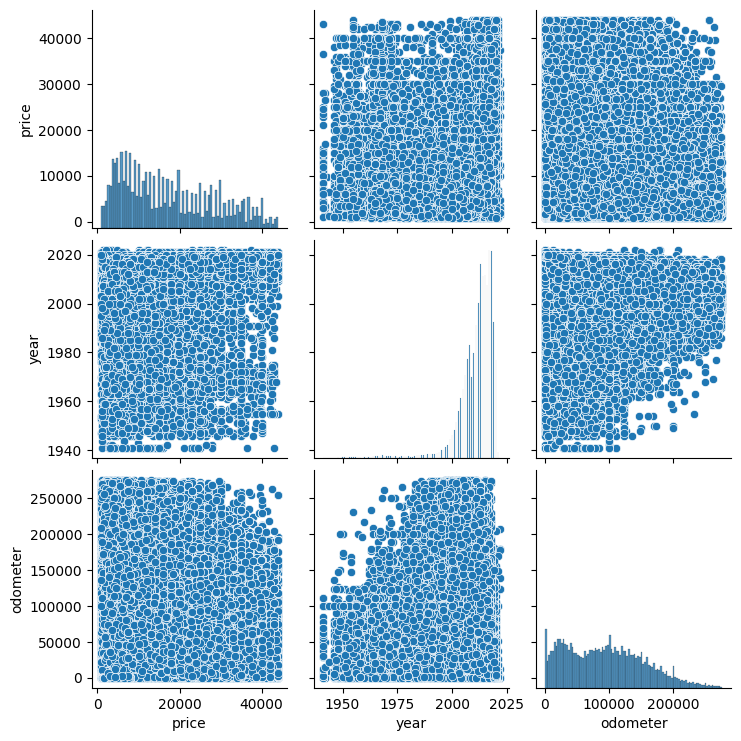

In [ ]:
sns.pairplot(testing_df)

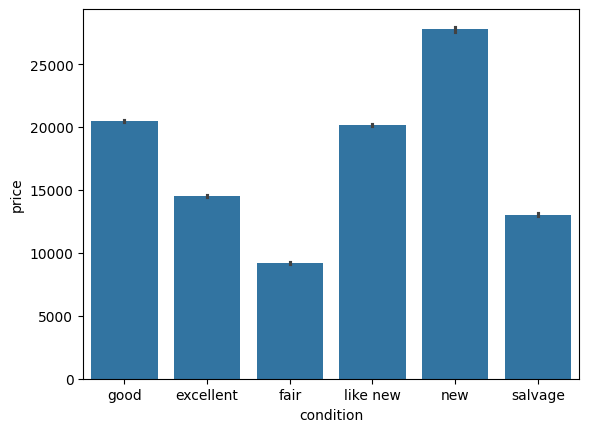

In [ ]:
ax = sns.barplot(x='condition', y='price', data=testing_df)

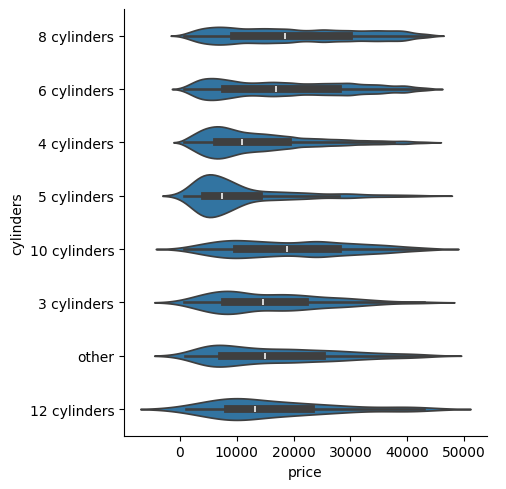

In [ ]:
sns.catplot(y='cylinders', x='price', kind='violin', data=testing_df)

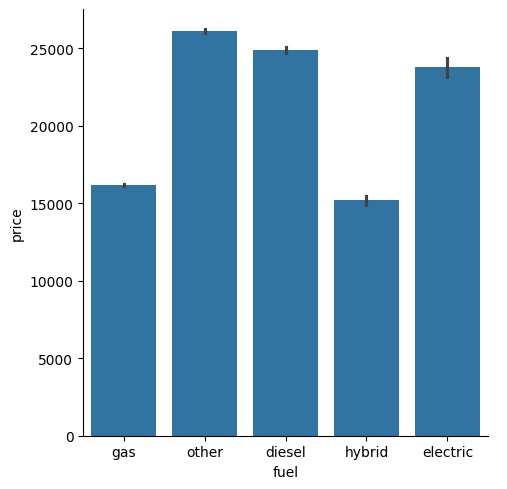

In [ ]:
sns.catplot(x='fuel', y='price', kind='bar',data=testing_df)

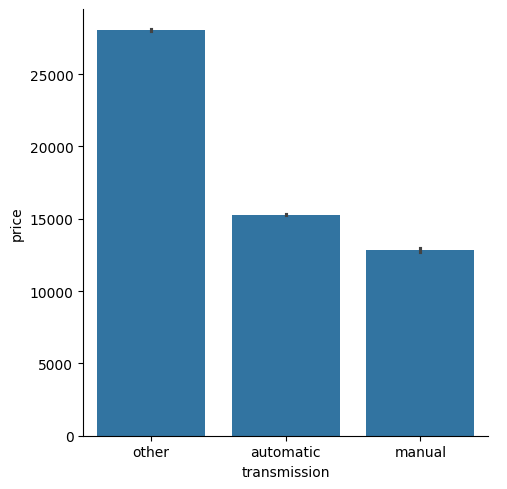

In [ ]:
sns.catplot(x='transmission', y='price', kind='bar', data=testing_df)

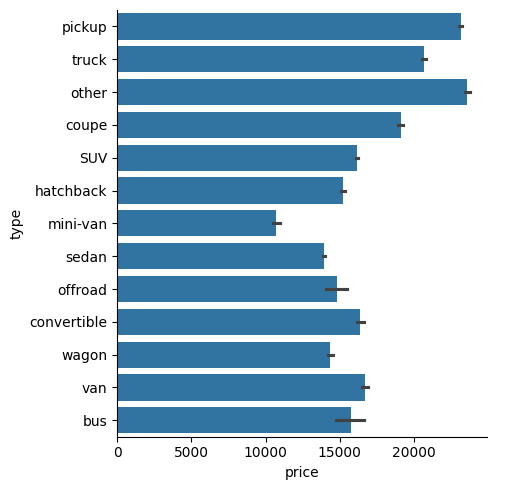

In [ ]:
sns.catplot(x='price', y='type', kind='bar', data=testing_df)

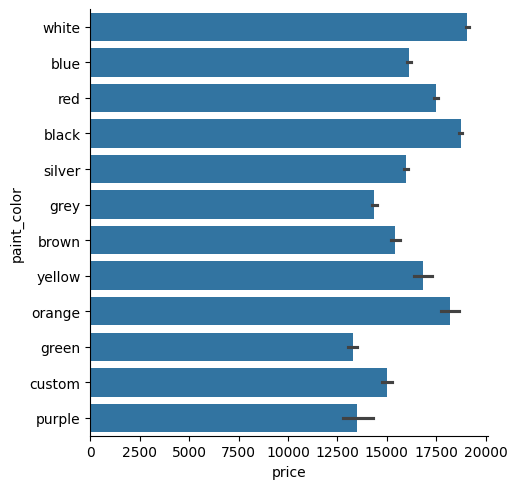

In [ ]:
sns.catplot(y='paint_color', x='price', kind='bar', data=testing_df)

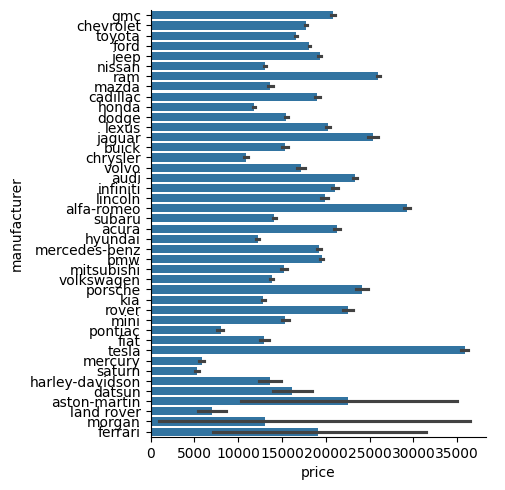

In [ ]:
sns.catplot(y='manufacturer', x='price', kind='bar', data=testing_df)

In [36]:
mean_prices = testing_df[testing_df['manufacturer'] == 'ferrari']['price'].mean()
print(mean_prices)

19150.571428571428


In [37]:
new_df = testing_df

In [38]:
new_df['year'] = new_df['year'].astype(int)

#Again I'm implementing something new here

In [39]:
temp_df = new_df

In [40]:
temp_df.drop(temp_df[(temp_df.price < 1000) & (temp_df.odometer < 60000) & (temp_df.year > 2010)].index, inplace=True)
temp_df.drop(temp_df[(temp_df.price < 200)].index, inplace=True)
temp_df.drop(temp_df[(temp_df.price > 50000)].index, inplace=True)

In [41]:
temp_df.loc[temp_df.manufacturer == 'tesla', 'cylinders'] = 0
temp_df.cylinders.fillna(0, inplace=True)
temp_df.cylinders = temp_df.cylinders.replace('other', 0)

<ipython-input-41-10d2884344f3>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  temp_df.cylinders.fillna(0, inplace=True)


In [42]:
temp_df.loc[(temp_df['transmission'] == 'other'), 'transmission'] = 'manual'

In [43]:
temp_df.drop(temp_df[temp_df.odometer < 10].index, inplace=True)
temp_df.drop(temp_df[temp_df.odometer > 300000].index, inplace=True)

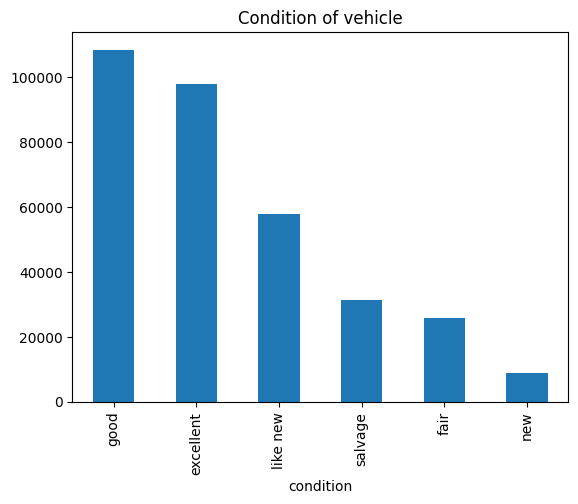

In [ ]:
import matplotlib.pyplot as plt
temp_df.condition.value_counts().plot.bar()
plt.title('Condition of vehicle')
plt.show()

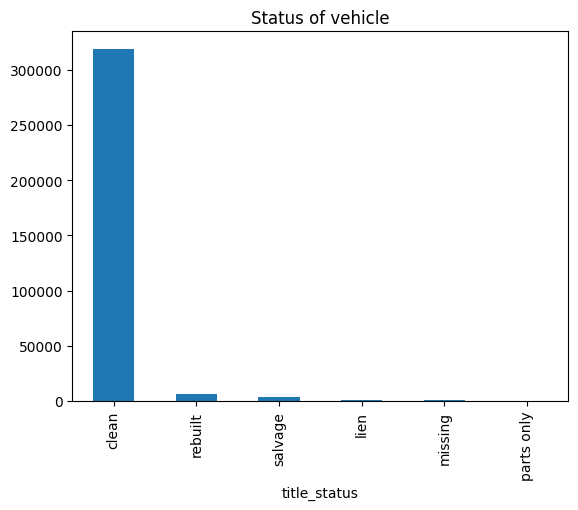

In [ ]:
temp_df.title_status.value_counts().plot.bar()
plt.title('Status of vehicle')
plt.show()

In [44]:
backup_temp_df = temp_df

In [45]:
new_df = backup_temp_df

In [46]:
idx1 = temp_df[temp_df['condition'] == 'salvage'].index

for w in ['salvage','lien','missing','parts only']:
  idx2 = temp_df[temp_df['title_status'] == w].index
  idx1 = idx1.union(idx2)

temp_df.drop(idx1, axis=0, inplace=True)

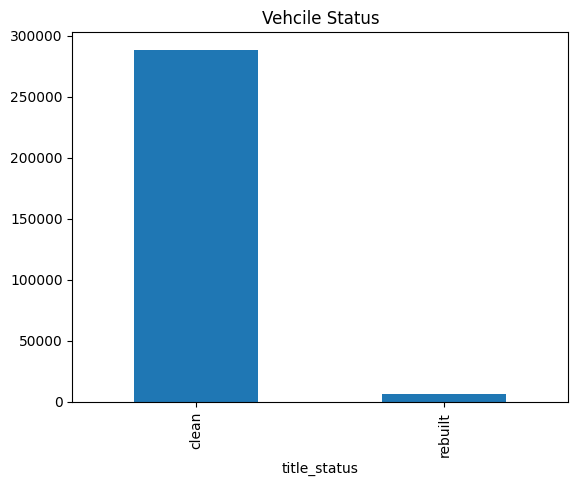

In [ ]:
temp_df.title_status.value_counts().plot.bar()
plt.title('Vehcile Status')
plt.show()

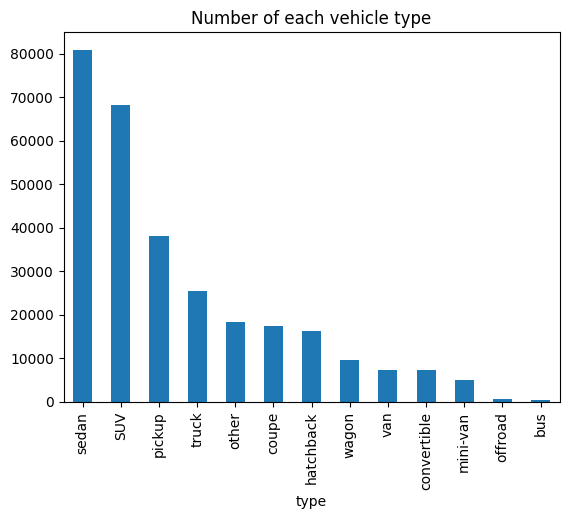

In [ ]:
temp_df.type.value_counts().plot.bar()
plt.title('Number of each vehicle type')
plt.show()

In [47]:
for v in ['bus', 'offroad']:
  temp_df = temp_df[temp_df['type'] != v]

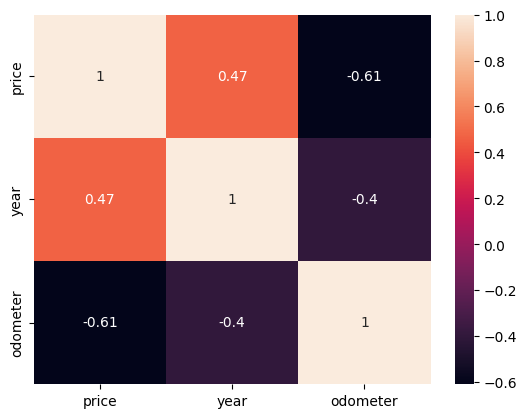

In [ ]:
cols = ['price','year','odometer']
sns.heatmap(temp_df[cols].corr(), annot=True)
plt.show()

In [48]:
temp_df.dropna(inplace=True)

In [49]:
temp_df.isna().sum()

,0
price,0
year,0
manufacturer,0
model,0
condition,0
cylinders,0
fuel,0
odometer,0
title_status,0
transmission,0


In [50]:
manufacturer_counts = temp_df['manufacturer'].value_counts()

In [51]:
def categorize_sales(manufacturer):
    sales_dict = {
        "ford": 47679, "chevrolet": 38150, "toyota": 25088, "honda": 16068, "nissan": 13906, "jeep": 13298,
        "bmw": 11433, "gmc": 10852, "ram": 10642, "dodge": 9353, "mercedes-benz": 8111, "hyundai": 7727,
        "volkswagen": 7535, "subaru": 7247, "lexus": 6553, "kia": 6361, "audi": 5969, "cadillac": 5221,
        "acura": 4936, "chrysler": 4520, "buick": 4382, "mazda": 4225, "infiniti": 3923, "lincoln": 3448,
        "volvo": 2695, "mitsubishi": 2649, "mini": 2019, "pontiac": 1773, "jaguar": 1641, "rover": 1340,
        "mercury": 915, "porsche": 876, "saturn": 834, "alfa-romeo": 815, "fiat": 691, "tesla": 605,
        "harley-davidson": 110, "datsun": 53, "aston-martin": 9, "land rover": 7, "ferrari": 6, "morgan": 3
    }

    sales = sales_dict.get(manufacturer, 0)
    if sales > 25000:
        return "High Selling"
    elif sales > 10000:
        return "Medium Selling"
    else:
        return "Low Selling"

temp_df['selling_category'] = temp_df['manufacturer'].apply(categorize_sales)

In [52]:
def categorize_paint_color(paint_color):
  sales_dict = {
        "white": 74515, "black": 62522, "silver": 43751, "blue": 32260, "red": 31073,
        "grey": 24774, "green": 7186, "brown": 7000, "custom": 6014, "orange": 2006,
        "yellow": 1915, "purple": 652
    }

  sales = sales_dict.get(paint_color, 0)

  if sales > 20000:
    return "Popular color"
  else:
    return "Less popular color"

temp_df['paint_color_category'] = temp_df['paint_color'].apply(categorize_paint_color)

In [53]:
def categorize_vehicle_type(vehicle_type):
  sales_dict = {
        "sedan": 80903, "SUV": 68178, "pickup": 38134, "truck": 25365, "other": 18335,
        "coupe": 17401, "hatchback": 16154, "wagon": 9591, "van": 7309,
        "convertible": 7270, "mini-van": 5028
  }
  sales = sales_dict.get(vehicle_type, 0)
  if sales > 25000:
    return "Popular"
  elif sales > 10000:
    return "Medium Popular"
  else:
    return "Less Popular"

temp_df['vehicle_type_category'] = temp_df['type'].apply(categorize_vehicle_type)

In [54]:
data_df = temp_df

In [55]:
temp_df['cylinders'] = temp_df['cylinders'].replace(0, 'other')

In [84]:
temp_df['drive'].value_counts()

,count
drive,
4wd,84067
fwd,83344
rwd,39978


In [57]:
temp_df.drop(columns=['type'], inplace=True)

In [58]:
temp_df.drop(columns=['manufacturer'], inplace=True)

In [59]:
temp_df.drop(columns=['paint_color'], inplace=True)

In [60]:
df['model'].value_counts()

,count
model,
f-150,8009
silverado 1500,5140
1500,4211
camry,3135
silverado,3023
...,...
Huyndai Sante Fe Limited,1
astro awd 4x4,1
escalade and,1


In [61]:
temp_df = temp_df.groupby('model').filter(lambda x: len(x) > 50)

In [65]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 207389 entries, 31 to 426878
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   price                  207389 non-null  int64  
 1   year                   207389 non-null  int64  
 2   model                  207389 non-null  object 
 3   condition              207389 non-null  object 
 4   cylinders              207389 non-null  object 
 5   fuel                   207389 non-null  object 
 6   odometer               207389 non-null  float64
 7   title_status           207389 non-null  object 
 8   transmission           207389 non-null  object 
 9   drive                  207389 non-null  object 
 10  selling_category       207389 non-null  object 
 11  paint_color_category   207389 non-null  object 
 12  vehicle_type_category  207389 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 22.2+ MB


In [66]:
from sklearn.model_selection import train_test_split
X = temp_df.drop(columns='price')
y = temp_df['price']
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#It performs OneHotEncoding on the model column result alot of columns will be generated

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

column_transformer = ColumnTransformer(transformers=[
    ('condition_ord', OrdinalEncoder(categories=[['fair','good','like new','excellent','new']]), ['condition']),
    ('cylinders_ord', OrdinalEncoder(categories=[['other','3 cylinders', '4 cylinders', '5 cylinders', '6 cylinders', '8 cylinders', '10 cylinders', '12 cylinders']]), ['cylinders']),
    ('fuel_ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['fuel']),
    ('title_ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['title_status']),
    ('transmission', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['transmission']),
    ('drive_ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['drive']),
    ('selling_category_ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['selling_category']),
    ('paint_color_category_ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['paint_color_category']),
    ('vehicle_type_category_ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['vehicle_type_category']),
    ('model_ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['model']),  # FIXED HERE
    ('num_scaler', StandardScaler(), ['year', 'odometer'])
], remainder='passthrough')

# Transform the data
data_transformed = column_transformer.fit_transform(temp_df)

# Extract feature names (Fix column mismatch issue)
feature_names = column_transformer.get_feature_names_out()

# Convert to DataFrame with correct column names
df_transformed = pd.DataFrame(data_transformed, columns=feature_names)
df_transformed.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207389 entries, 0 to 207388
Columns: 952 entries, condition_ord__condition to remainder__price
dtypes: float64(952)
memory usage: 1.5 GB


#What this does is that it performs target encoding on the model columns as i've been tolded target encoding is not allowed i've no choice other than oneHotEncoding but i've kept this for fun

In [64]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 207389 entries, 31 to 426878
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   price                  207389 non-null  int64  
 1   year                   207389 non-null  int64  
 2   model                  207389 non-null  object 
 3   condition              207389 non-null  object 
 4   cylinders              207389 non-null  object 
 5   fuel                   207389 non-null  object 
 6   odometer               207389 non-null  float64
 7   title_status           207389 non-null  object 
 8   transmission           207389 non-null  object 
 9   drive                  207389 non-null  object 
 10  selling_category       207389 non-null  object 
 11  paint_color_category   207389 non-null  object 
 12  vehicle_type_category  207389 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 22.2+ MB


In [63]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 5.3 MB/s eta 0:00:00


In [71]:
from category_encoders import TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
import pandas as pd

# Define categorical columns for Target Encoding
target_encode_cols = ['model']

# 🔹 FIT only on X_train
target_encoder = TargetEncoder()
X_train[target_encode_cols] = target_encoder.fit_transform(X_train[target_encode_cols], y_train)

# 🔹 TRANSFORM X_test using fitted encoder (without fitting again)
X_test[target_encode_cols] = target_encoder.transform(X_test[target_encode_cols])

# Define Column Transformer for encoding
column_transformer = ColumnTransformer(transformers=[
    ('condition_ord', OrdinalEncoder(categories=[['fair', 'good', 'like new', 'excellent', 'new']]), ['condition']),
    ('cylinders_ord', OrdinalEncoder(categories=[['other', '3 cylinders', '4 cylinders', '5 cylinders', '6 cylinders', '8 cylinders', '10 cylinders', '12 cylinders']]), ['cylinders']),
    ('fuel_ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['fuel']),
    ('title_ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['title_status']),
    ('transmission', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['transmission']),
    ('drive_ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['drive']),
    ('selling_category_ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['selling_category']),
    ('paint_color_category_ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['paint_color_category']),
    ('vehicle_type_category_ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['vehicle_type_category']),
    ('num_scaler', StandardScaler(), ['year', 'odometer'])
], remainder='passthrough')

# 🔹 FIT and TRANSFORM X_train
X_train_transformed = column_transformer.fit_transform(X_train)
X_test_transformed = column_transformer.transform(X_test)  # Transform X_test (DO NOT FIT AGAIN!)

# Extract feature names
feature_names = column_transformer.get_feature_names_out()

# Convert to DataFrame
X_train_encoded = pd.DataFrame(X_train_transformed, columns=feature_names)
X_test_encoded = pd.DataFrame(X_test_transformed, columns=feature_names)

# ✅ Now your X_train_encoded and X_test_encoded are correctly transformed with matching columns
X_train_encoded.info()
X_test_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165911 entries, 0 to 165910
Data columns (total 25 columns):
 #   Column                                                             Non-Null Count   Dtype  
---  ------                                                             --------------   -----  
 0   condition_ord__condition                                           165911 non-null  float64
 1   cylinders_ord__cylinders                                           165911 non-null  float64
 2   fuel_ohe__fuel_diesel                                              165911 non-null  float64
 3   fuel_ohe__fuel_electric                                            165911 non-null  float64
 4   fuel_ohe__fuel_gas                                                 165911 non-null  float64
 5   fuel_ohe__fuel_hybrid                                              165911 non-null  float64
 6   fuel_ohe__fuel_other                                               165911 non-null  float64
 7   title_ohe__

In [76]:
import pickle
pickle.dump(target_encoder, open('target_encoder.pkl', 'wb'))
pickle.dump(column_transformer, open('column_transformer.pkl', 'wb'))

In [ ]:
df_transformed['num_scaler__year'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 207389 entries, 0 to 207388
Series name: num_scaler__year
Non-Null Count   Dtype  
--------------   -----  
207389 non-null  float64
dtypes: float64(1)
memory usage: 1.6 MB


In [ ]:
temp_df['year'].info()

<class 'pandas.core.series.Series'>
Index: 207389 entries, 31 to 426878
Series name: year
Non-Null Count   Dtype
--------------   -----
207389 non-null  int64
dtypes: int64(1)
memory usage: 3.2 MB


In [ ]:
df_transformed['car_age'] = 2025 - temp_df['year'].reset_index(drop=True)

In [ ]:
age_df = 2025 - temp_df['year'].reset_index(drop=True)
print(age_df)
df_transformed['mileage'] = temp_df['odometer'].reset_index(drop=True) / age_df

0         12
1         13
2          9
3          6
4          9
          ..
207384     5
207385     7
207386     5
207387     5
207388     7
Name: year, Length: 207389, dtype: int64


In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train_encoded,y_train)
y_pred = model.predict(X_test_encoded)

print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Model Score: ", model.score(X_test_encoded, y_test)*100)

Mean Squared Error:  29798794.387891117
Mean Absolute Error:  3948.2117932602478
Model Score:  76.95025693269312


#This is after using target encoding

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
feature_importance = pd.DataFrame({
    'Features': X_train.columns,
    'Importance': regressor.feature_importances_
})

print("Mean Squared Error: ", round(mean_squared_error(y_test,y_pred),2))
print("Mean Absolute Error: ", round(mean_absolute_error(y_test, y_pred),2))
print("R2: ", round(r2_score(y_test, y_pred),2))
print("Accuracy score: ", regressor.score(X_test, y_test) * 100)

Mean Squared Error:  7622871.38
Mean Absolute Error:  1459.37
R2:  0.94
Accuracy score:  94.10361290545735


In [ ]:
import pickle
pickle.dump(regressor, open('car_price_pred.pkl', 'wb'))

#This after using OneHotEncoding

In [74]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train_encoded, y_train)
y_pred = regressor.predict(X_test_encoded)
feature_importance = pd.DataFrame({
    'Features': X_train_encoded.columns,
    'Importance': regressor.feature_importances_
})

print("Mean Squared Error: ", round(mean_squared_error(y_test,y_pred),2))
print("Mean Absolute Error: ", round(mean_absolute_error(y_test, y_pred),2))
print("R2: ", round(r2_score(y_test, y_pred),2))
print("Accuracy score: ", regressor.score(X_test_encoded, y_test) * 100)

Mean Squared Error:  7585247.3
Mean Absolute Error:  1454.17
R2:  0.94
Accuracy score:  94.13271559898249


In [77]:
pickle.dump(regressor, open('trained_model.pkl', 'wb'))

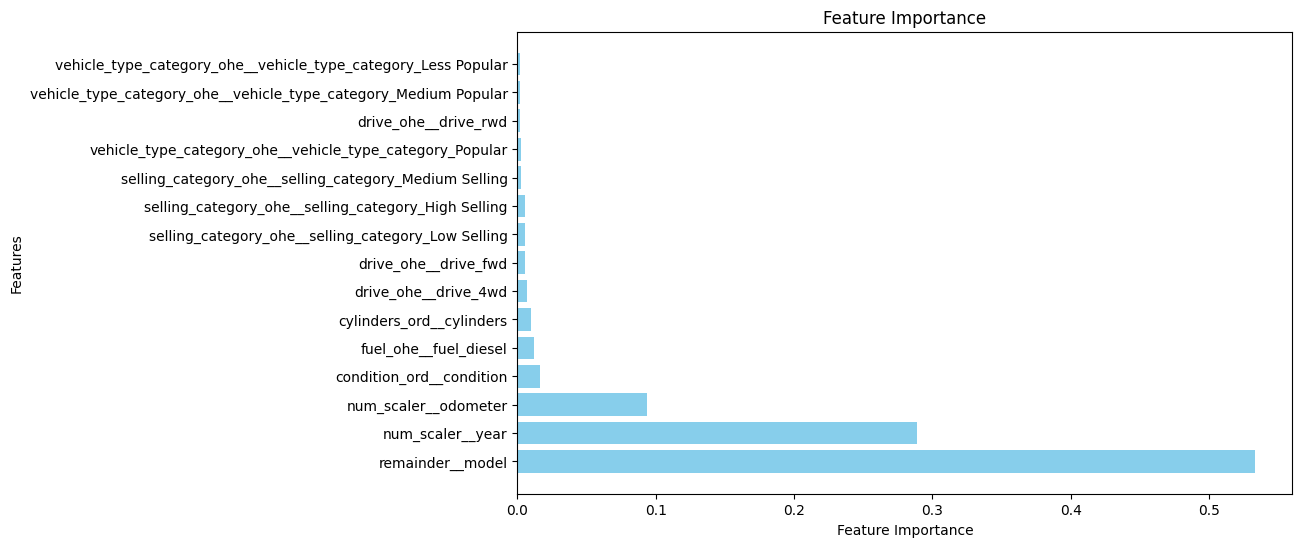

In [75]:
feature_importance = feature_importance.sort_values(by='Importance', ascending=False).head(15)
plt.figure(figsize=(10,6))
plt.barh(feature_importance['Features'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()